In [22]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data_set = "C://Users//eric//Desktop/biologicalresult.csv"
# Data from https://www.waterqualitydata.us/portal/#countrycode=US&statecode=US%3A26&minresults=1&startDateLo=01-01-2018&startDateHi=12-31-2018&providers=STORET&mimeType=csv&sorted=yes&dataProfile=biological

In [23]:
df = pd.read_csv(data_set,low_memory=False,parse_dates=['ActivityStartDate'],decimal='.')
df1 = df.dropna(axis='columns',how='all')  #several columns had no data.  removed them.

In [24]:
df2 = df1[((df1['CharacteristicName'].str.contains('pH')))]
df2 = df2[['ActivityStartDate','MonitoringLocationIdentifier','CharacteristicName',
           'ResultMeasureValue','ActivityLocation/LatitudeMeasure',
           'ActivityLocation/LongitudeMeasure']]

In [25]:
df2['ResultMeasureValue'] = pd.to_numeric(df2.ResultMeasureValue, errors='coerce')
df2 = df2[((df2['ResultMeasureValue'] <= 14) & (df2['ResultMeasureValue'] >= 0))]  #pH range removed nonsense data
df2.sort_values(by=['ActivityStartDate'],inplace=True)
df2['ResultMeasureValue'].describe()

count   18261.000000
mean        7.780329
std         0.782406
min         0.000000
25%         7.530000
50%         7.900000
75%         8.170000
max        12.760000
Name: ResultMeasureValue, dtype: float64

In [26]:
df2 = df2.reset_index(drop=True) #cleared out old index.

In [27]:
df_up = df2[(df2['ActivityLocation/LatitudeMeasure']<=47.444836)&(df2['ActivityLocation/LatitudeMeasure']>45.706247)]
df_top_mit = df2[(df2['ActivityLocation/LatitudeMeasure']<=45.706247)&(df2['ActivityLocation/LatitudeMeasure']>43.611565)]
df_bottom_mit = df2[(df2['ActivityLocation/LatitudeMeasure']<=43.611565)&(df2['ActivityLocation/LatitudeMeasure']>41.787492)]

In [32]:
up_mean = round(df_up['ResultMeasureValue'].mean(),6)
top_mit_mean = round(df_top_mit['ResultMeasureValue'].mean(),6)
bottom_mit_mean = round(df_bottom_mit['ResultMeasureValue'].mean(),6)

<IPython.core.display.Javascript object>


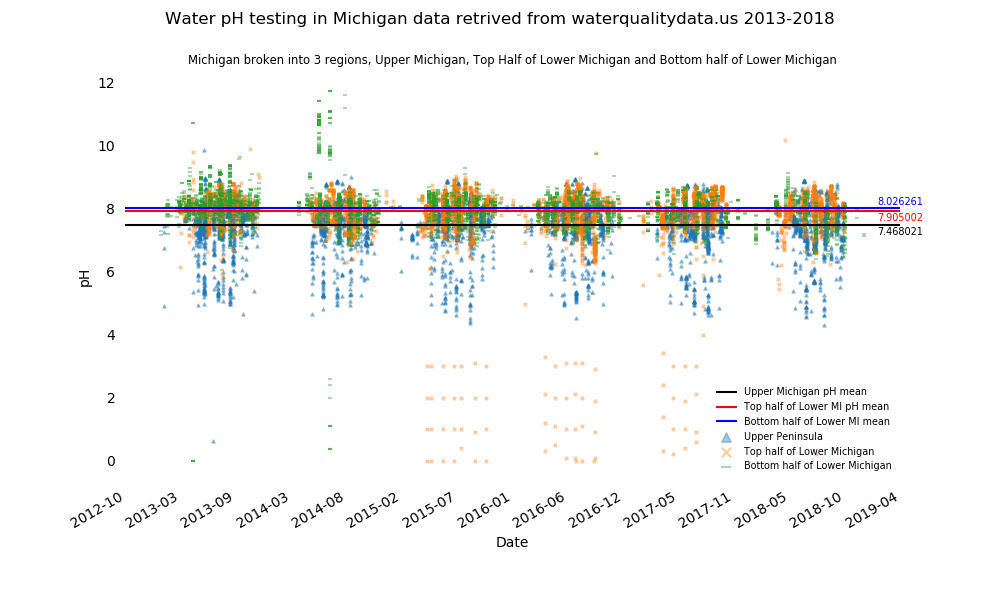

In [43]:
x = df_up['ActivityStartDate']
x1 = df_top_mit['ActivityStartDate']
x2 = df_bottom_mit['ActivityStartDate']

plt.figure(figsize=(10,6))

plt.scatter(x,df_up['ResultMeasureValue'],s=5,alpha=0.4,label='Upper Peninsula',marker='^')
plt.scatter(x1,df_top_mit['ResultMeasureValue'],s=5,alpha=0.4,label='Top half of Lower Michigan',marker='x')
plt.scatter(x2,df_bottom_mit['ResultMeasureValue'],s=5,alpha=0.4,label='Bottom half of Lower Michigan',marker='_')

plt.suptitle('Water pH testing in Michigan data retrieved from waterqualitydata.us 2013-2018')
plt.title('Michigan broken into 3 regions, Upper Michigan, Top Half of Lower Michigan and Bottom half of Lower Michigan',fontsize='small')

plt.axhline(up_mean, color = 'black', label = 'Upper Michigan pH mean',linestyle='-',xmin=0,xmax=1)
plt.axhline(top_mit_mean, color = 'red', label = 'Top half of Lower MI pH mean',linestyle='-',xmin=0,xmax=1)
plt.axhline(bottom_mit_mean, color = 'blue', label = 'Bottom half of Lower MI mean',linestyle='-',xmin=0,xmax=1)


ax = plt.gca()
ax.xaxis.set_major_locator(LinearLocator(numticks=15))
ax.grid(False)
ax.set_frame_on(False) 
ax.set_xlabel('Date')
ax.set_ylabel('pH')
ax.tick_params(left=False,bottom=False)
ax.legend(loc=4,fontsize='x-small',frameon=False,markerscale=3)
ax.text(0.99999,0.6, up_mean, transform=ax.transAxes, fontsize=7, ha='center', color='black')
ax.text(0.99999,0.635, top_mit_mean, transform=ax.transAxes, fontsize=7, ha='center', color='red')
ax.text(0.99999,0.673, bottom_mit_mean, transform=ax.transAxes, fontsize=7, ha='center', color='blue')

plt.gcf().autofmt_xdate()
formatter = DateFormatter('%Y-%m')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
